In [8]:
from classifiers import NaiveBayes, LDA, QDA
from generate_data import generate_data_scheme_1, generate_data_scheme_2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [9]:
rho_list = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
a = 2

models = [NaiveBayes(), LDA(), QDA()]

test_sizes = [0.05, 0.1, 0.2, 0.3, 0.4]

In [10]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

## Single experiment

In [11]:

for rho in rho_list:
    print(f"Current value of rho = {rho}")
    
    X, y = generate_data_scheme_2(1000, a, rho)
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy(y_test, y_pred)
        

        print(f"\tModel {model.name} accuracy: {round(acc*100, 2)}%")

Current value of rho = 0
	Model Naive Bayes accuracy: 91.0%
	Model LDA accuracy: 90.5%
	Model QDA accuracy: 91.0%
Current value of rho = 0.1
	Model Naive Bayes accuracy: 91.0%
	Model LDA accuracy: 91.5%
	Model QDA accuracy: 91.0%
Current value of rho = 0.3
	Model Naive Bayes accuracy: 92.5%
	Model LDA accuracy: 92.5%
	Model QDA accuracy: 92.5%
Current value of rho = 0.5
	Model Naive Bayes accuracy: 85.5%
	Model LDA accuracy: 86.5%
	Model QDA accuracy: 85.0%
Current value of rho = 0.7
	Model Naive Bayes accuracy: 83.0%
	Model LDA accuracy: 82.5%
	Model QDA accuracy: 82.0%
Current value of rho = 0.9
	Model Naive Bayes accuracy: 86.0%


	Model LDA accuracy: 85.0%
	Model QDA accuracy: 86.5%


## Experiments on multiple test-train splits

In [12]:
columns = ['model', 'rho', 'acc']
res = []

for test_size in test_sizes:

    for rho in rho_list:
        # print(f"Current value of a = {a}")
        
        X, y = generate_data_scheme_2(1000, a, rho)
            
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=123
        )

        
        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy(y_test, y_pred)
            
            res.append([model.name, rho, acc])
            # print(f"\tModel {model.name} accuracy: {round(acc*100, 2)}%")

In [13]:
import seaborn as sns

df = pd.DataFrame(res, columns=columns)

nb_df = df[df['model'] == 'Naive Bayes']
lda_df = df[df['model'] == 'LDA']
qda_df = df[df['model'] == 'QDA']


Text(0.5, 1.0, 'Naive Bayes')

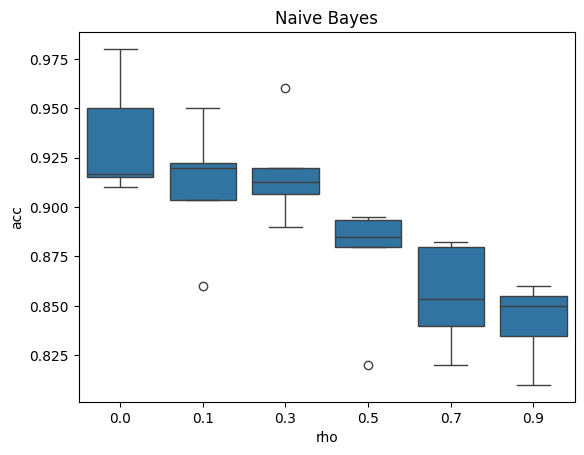

In [14]:
sns.boxplot(x="rho", y="acc", data=nb_df).set_title("Naive Bayes")

Text(0.5, 1.0, 'LDA')

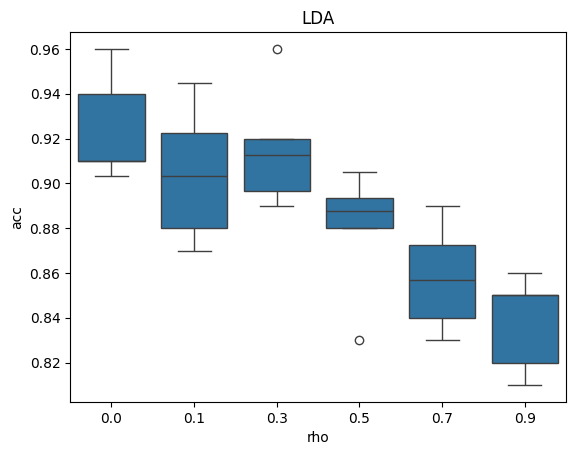

In [15]:
sns.boxplot(x="rho", y="acc", data=lda_df).set_title("LDA")

Text(0.5, 1.0, 'QDA')

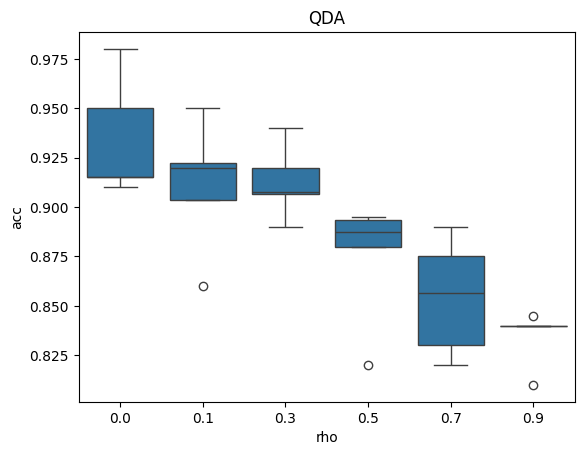

In [16]:
sns.boxplot(x="rho", y="acc", data=qda_df).set_title("QDA")

It can be clearly seen, that the higher rho value is, the poorer performance is presented by all the models.